# Lab 6: Geodemographics

In this challenge, we will create a geodemographic classification using the k-means clustering algorithm. The main goal is to generate a meaningful and informative classification that captures the diversity of output areas in Edinburgh using the census data.

The workflow of the analysis is as follows:
1. Define the goal for the geodemographic classification.
2. Construct the data by combining a shapefile with boundaries of Output areas in Edinburgh with census data,
3. Identify variables of interest which allow us to effectively segmenting neighbourhoods:
   - conduct exploratory analysis,
   - transform these variables into percentages.
4. Prepare and clean the dataset:
   - standardize variables,
   - check for multicollinearity and remove redundant variables,
   - handle missing values.
5. Perform K-means clustering:
   - determine the optimum number of clusters using the Elblow method,
   - evaluate and visualize the cluster groups,
   - interpret the cluster centres. 
6. Map the final cluster groups

## 1 Define the problem

The goal of this analysis is to classify neighbourhoods to inform location and marketing decisions of a European premium retail chain. This chain is planning on continuing their expansion in the UK by setting up several stores in Edinburgh. Their typical target group are younger to middle-aged, affluent individuals and families, but they are trying to appeal to increasingly younger age groups, such as university students, to expand their customer base.
The results of this analysis will be used to identify potential locations of chain's new stores in Edinburgh and to inform marketing decisions.

## 2 Construct the dataset

The first step is to contruct the dataset for geodemographic analysis by merging census data on the level of output areas with a shapefile containing geometries of output areas for selected city, in our case, Edinburgh.

Since the Scotland's census data is available already, we only need to obtain the shapefiles of output areas in Edinburgh. We obtain these from UK Data Service, available here https://borders.ukdataservice.ac.uk/, where we filter areas in Edinburgh.

After we obtained the shapefile, we can merge it with the census data.

In [25]:
import pandas as pd
import geopandas as gpd

# Load downloaded shapefile
dz_path = "Lab6_Data/edinburgh/BoundaryData/scotland_oa_2011.shp"
dz = gpd.read_file(dz_path)
dz.head()

,objectid,code,hhcount,popcount,council,sqkm,hect,masterpc,easting,northing,shape_1_le,shape_1_ar,label,name,geometry
0,7324,S00106438,65,151,S12000036,0.037986,3.798556,EH28 8SU,311939,672588,803.514275,3.798556e+04,S12000036S00106438,S00106438,"POLYGON ((312053.000 672642.000, 312066.000 67..."
1,16098,S00105168,56,85,S12000036,0.002870,0.286985,EH11 1JH,324213,672474,212.626743,2.869847e+03,S12000036S00105168,S00105168,"POLYGON ((324246.744 672500.389, 324261.290 67..."
2,18811,S00104758,32,66,S12000036,0.001676,0.167614,EH9 1PE,325957,672335,173.501684,1.676137e+03,S12000036S00104758,S00104758,"POLYGON ((325970.413 672363.682, 325972.882 67..."
3,15991,S00106865,48,133,S12000036,10.147070,1014.707020,EH14 7JD,314377,665609,19122.395895,1.014707e+07,S12000036S00106865,S00106865,"POLYGON ((315157.369 666212.846, 315173.727 66..."
4,17596,S00106064,50,100,S12000036,0.010604,1.060360,EH15 2NA,331564,673116,495.949143,1.060360e+04,S12000036S00106064,S00106064,"POLYGON ((331506.489 673162.694, 331671.000 67..."


In [26]:
# Read census data
csv_path = "Lab6_Data/raw_census_data/merged_census_data.csv"
csv_data = pd.read_csv(csv_path, low_memory=False)

# Merge the GeoDataFrame with the DataFrame based on the oa_code
merged_data = dz.merge(csv_data, left_on='code', right_on='oa_code', how='left')

# Save the resulting dataset as a new shapefile
merged_data.to_file('Lab6_Data/edinburgh/edinburgh_census_data.shp', index=False)

/var/folders/_v/0ysnzh811hj_hnrpjkv8j6fw0000gn/T/ipykernel_48903/3980186588.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_data.to_file('Lab6_data/edinburgh_census_data.shp', index=False)


In [28]:
merged_data.head()

,objectid,code,hhcount,popcount,council,sqkm,hect,masterpc,easting,northing,...,I. Accommodation and food service activities,J. Information and communication,K. Financial and insurance activities,L. Real estate activities,M. Professional scientific and technical activities,N. Administrative and support service activities,O. Public administration and defence compulsory social security,P. Education,Q. Human health and social work activities,R S T U. Other
0,7324,S00106438,65,151,S12000036,0.037986,3.798556,EH28 8SU,311939,672588,...,4,1,3,0,0,5,4,7,17,5
1,16098,S00105168,56,85,S12000036,0.002870,0.286985,EH11 1JH,324213,672474,...,3,4,7,0,5,0,4,9,11,2
2,18811,S00104758,32,66,S12000036,0.001676,0.167614,EH9 1PE,325957,672335,...,5,3,5,0,2,0,1,6,7,0
3,15991,S00106865,48,133,S12000036,10.147070,1014.707020,EH14 7JD,314377,665609,...,3,4,3,0,3,7,1,9,11,6
4,17596,S00106064,50,100,S12000036,0.010604,1.060360,EH15 2NA,331564,673116,...,1,1,3,0,7,0,2,8,2,0


## 3 Identify variables of interest

As the next step in our analysis, we select variables based on which we then perform clustering. Since our geodemographic classification will be for commercial purposes, we focus on demographic and economic characteristics to identify socio-economic groups. However, note that the initial choice of variables is not definite, but after performing clustering and obtaining results, we adjust the variable choice. This is an iterative process which we repeat several times before we obtain a meaningful classification.

### 3.1 Exploratory Analysis
To inform our variable choice, we first explore some variables which could be of interest in the context of our problem. We start by plotting the distribution of some of the variables using histograms.

In [ ]:
list(merged_data.columns)

/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



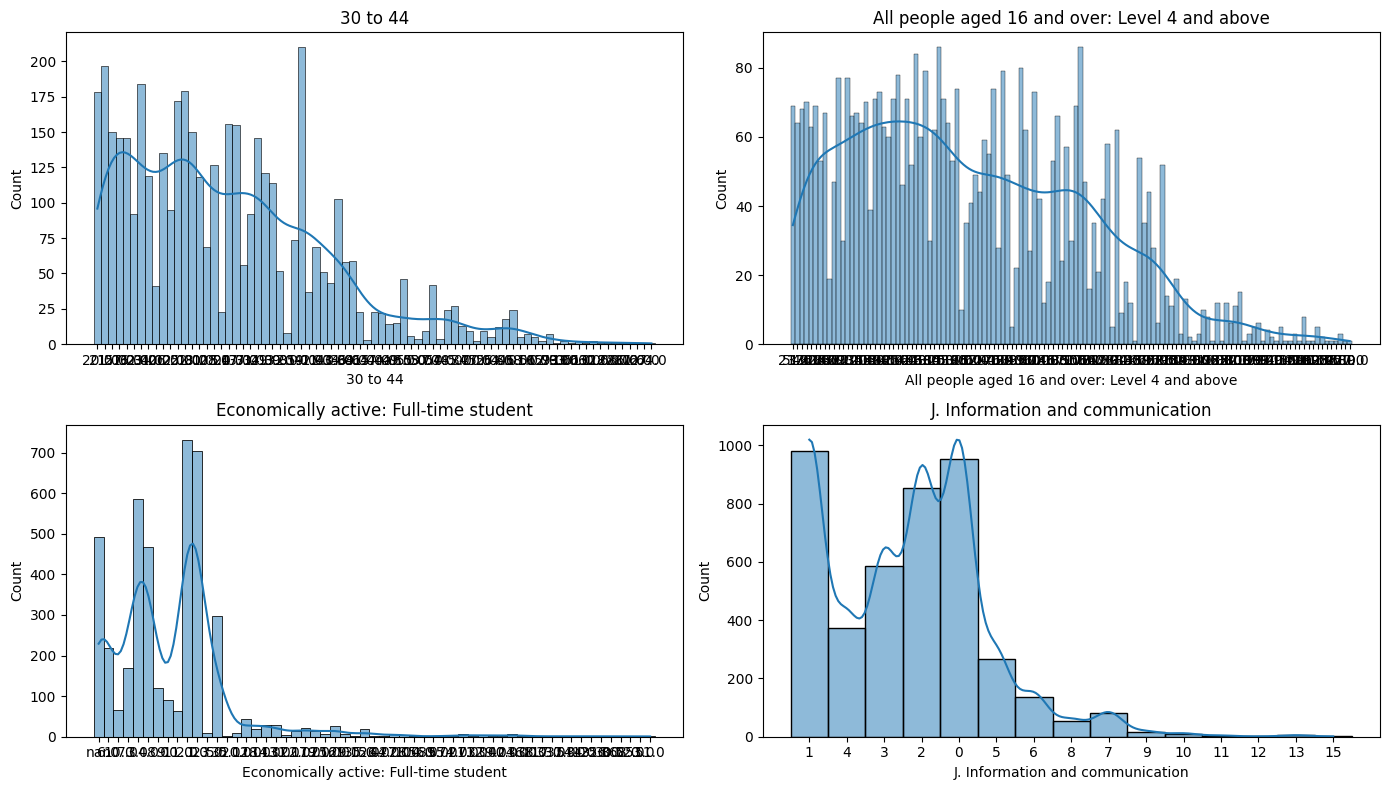

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select attributes to plot
attributes_to_plot = ['30 to 44',
                      'All people aged 16 and over: Level 4 and above',
                      'Economically active: Full-time student',
                      'J. Information and communication']

plt.figure(figsize=(14, 8))

# Iterate over the attributes and plot each of them
for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_data[attribute].astype(str), kde=True)
    plt.title(attribute)

plt.tight_layout()
plt.show()

### 3.2 Transform variables 
Since the census data on population subgroups are available in terms of counts (number of individuals of given subgroup per output area), we need to transform them into percentages before proceeding to clustering. First, define a function which calculates the proportions of population of given subgroup in each output area and subsequently, we apply it to our data to calculate percentages.

In [244]:
# Define a function to calculate percentages
def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
            
        # Force values into numeric
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

In [302]:
# List of the denominators
total_cols = ['All people aged 16 and over',
              'All people aged 16 and over',
              'All people',
              'All people.1',
              'All people.2',
              'All people.2',
              'All people.3',
              'All households',
              'All households',
              'All people aged 16 to 74', 
              'All people aged 16 to 74',
              'All people aged 16 to 74',
              'All people aged 16 to 74',
              'All people aged 16 and over.1',
              'All people aged 16 and over.1',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment']

# List of the corresponding numerators
value_cols = ['All people aged 16 and over: Level 4 and above',
              'All people aged 16 and over: No qualifications',
              'No religion',
              '30 to 44',
              'Males',
              'Females',
              'Good health',
              'One family only: Married or same-sex civil partnership couple: With dependent children',
              'One family only: All aged 65 and over',
              'Economically active: Employee: Full-time',
              'Economically active: Full-time student',
              'Economically active: Unemployed',
              'Economically inactive: Looking after home or family',
              'Single (never married or never registered a same-sex civil partnership)',
              'Married',
              'K. Financial and insurance activities', 
              'J. Information and communication', 
              'P. Education',
              'F. Construction']

result_dataframe = calculate_percentages(merged_data, total_cols, value_cols)

In [303]:
result_dataframe.head()

,All people aged 16 and over: Level 4 and above_percentage,All people aged 16 and over: No qualifications_percentage,No religion_percentage,30 to 44_percentage,Males_percentage,Females_percentage,Good health_percentage,One family only: Married or same-sex civil partnership couple: With dependent children_percentage,One family only: All aged 65 and over_percentage,Economically active: Employee: Full-time_percentage,Economically active: Full-time student_percentage,Economically active: Unemployed_percentage,Economically inactive: Looking after home or family_percentage,Single (never married or never registered a same-sex civil partnership)_percentage,Married_percentage,K. Financial and insurance activities_percentage,J. Information and communication_percentage,P. Education_percentage,F. Construction_percentage
0,16.535433,37.795276,35.761589,13.245033,52.317881,47.682119,25.827815,9.230769,3.076923,48.695652,NaN,3.478261,1.739130,37.007874,40.157480,3.614458,1.204819,8.433735,4.819277
1,60.000000,7.058824,56.470588,24.705882,45.882353,54.117647,21.176471,NaN,1.785714,45.000000,7.500000,3.750000,1.250000,81.176471,9.411765,12.500000,7.142857,16.071429,3.571429
2,57.812500,NaN,46.969697,22.727273,51.515152,48.484848,25.757576,3.125000,NaN,41.269841,15.873016,4.761905,1.587302,85.937500,9.375000,13.157895,7.894737,15.789474,0.000000
3,40.000000,10.476190,37.593985,20.300752,54.887218,45.112782,15.037594,31.250000,10.416667,35.294118,6.862745,NaN,3.921569,29.523810,63.809524,4.166667,5.555556,12.500000,8.333333
4,44.444444,28.395062,36.000000,16.000000,45.000000,55.000000,18.000000,18.000000,10.000000,22.727273,4.545455,4.545455,3.030303,17.283951,48.148148,10.000000,3.333333,26.666667,0.000000


## 4 Prepare and clean the dataset for clustering

### 4.1 Concaternate datasets

The next step is to clean and prepare dataset for clustering. First, we concaternate the marged dataset and dataframe with calculated percentages. We only keep the columns where population subgroups are expressed in terms of percentages.

In [304]:
# Concatenate the resulting tables
concat_df = pd.concat([merged_data, result_dataframe], axis=1, ignore_index=False)
concat_df.head()
concat_df.columns

Index(['objectid', 'code', 'hhcount', 'popcount', 'council', 'sqkm', 'hect',
       'masterpc', 'easting', 'northing',
       ...
       'Economically active: Employee: Full-time_percentage',
       'Economically active: Full-time student_percentage',
       'Economically active: Unemployed_percentage',
       'Economically inactive: Looking after home or family_percentage',
       'Single (never married or never registered a same-sex civil partnership)_percentage',
       'Married_percentage',
       'K. Financial and insurance activities_percentage',
       'J. Information and communication_percentage',
       'P. Education_percentage', 'F. Construction_percentage'],
      dtype='object', length=155)

In [305]:
# Subset relevant attributes
keep_cols= [
    'code',
    'popcount',
    'hhcount',
    'geometry',
    'All people aged 16 and over: Level 4 and above_percentage',
    'All people aged 16 and over: No qualifications_percentage',
    'No religion_percentage',
    '30 to 44_percentage',
    'Males_percentage',
    'Females_percentage',
    'Good health_percentage',
    'One family only: Married or same-sex civil partnership couple: With dependent children_percentage',
    'One family only: All aged 65 and over_percentage',
    'Single (never married or never registered a same-sex civil partnership)_percentage',
    'Married_percentage',
    'Economically active: Employee: Full-time_percentage',
    'Economically active: Full-time student_percentage',
    'Economically active: Unemployed_percentage',
    'Economically inactive: Looking after home or family_percentage',
    'K. Financial and insurance activities_percentage', 
    'J. Information and communication_percentage', 
    'P. Education_percentage',
    'F. Construction_percentage'
]

edi_census_data = concat_df[keep_cols]

In [306]:
# Define shorter column labels
short_column_names = {
    'All people aged 16 and over: Level 4 and above_percentage': 'Edu_Level4',
    'All people aged 16 and over: No qualifications_percentage': 'No_qualif',
    '30 to 44_percentage': '30_to_44',
    'No religion_percentage': 'No_Religion',
    'Males_percentage': 'Males',
    'Females_percentage': 'Females',
    'Good health_percentage': 'Good_Health',
    'One family only: Married or same-sex civil partnership couple: With dependent children_percentage': 'HH_children',
    'One family only: All aged 65 and over_percentage': 'HH_retired',
    'Single (never married or never registered a same-sex civil partnership)_percentage': 'Single',
    'Married_percentage': 'Married',
    'Economically active: Employee: Full-time_percentage': 'Emp_FullTime',
    'Economically active: Full-time student_percentage': 'Student',
    'Economically active: Unemployed_percentage': 'Unemployed',
    'Economically inactive: Looking after home or family_percentage': 'At_Home',
    'K. Financial and insurance activities_percentage': 'Finance',
    'J. Information and communication_percentage':'Info_Comm',
    'P. Education_percentage': 'Education',
    'F. Construction_percentage': 'Construction'
}

edi_census_data = edi_census_data.rename(columns=short_column_names)

### 4.2 Standardize variables 

To avoid large values dominating the clustering process, we standardize variables which helps to ensure that all variables have equal weights. By standardazing the variables, we transform them such that they have mean 0 and the values represent the number of standard deviations from the mean.

In [307]:
# Filter only float variables
numeric_columns = edi_census_data.select_dtypes(include='float64')

# Calculate z-score for each column
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

,Edu_Level4,No_qualif,No_Religion,30_to_44,Males,Females,Good_Health,HH_children,HH_retired,Single,Married,Emp_FullTime,Student,Unemployed,At_Home,Finance,Info_Comm,Education,Construction
0,-1.242003,1.429446,-0.876620,-1.082341,0.628442,-0.628442,-0.479805,-0.391066,-0.822287,-0.377058,0.111336,0.611757,NaN,-0.339917,-0.813641,-1.093966,-0.798349,-0.290944,-0.023835
1,0.943812,-0.816529,1.078255,0.195322,-0.496565,0.496565,-1.212030,NaN,-1.030720,1.818990,-1.485709,0.312919,0.448060,-0.264481,-0.966931,0.302781,1.005674,0.963301,-0.329788
2,0.833804,NaN,0.181396,-0.025254,0.488115,-0.488115,-0.490862,-1.012509,NaN,2.055707,-1.487618,0.011290,2.285081,0.016427,-0.861223,0.406198,1.234101,0.916999,-1.205449
3,-0.061980,-0.566815,-0.703647,-0.295765,1.077593,-1.077593,-2.178425,1.850044,0.362533,-0.749163,1.339909,-0.471920,0.308248,NaN,-0.129679,-1.007162,0.523439,0.376809,0.837759
4,0.161530,0.742553,-0.854115,-0.775216,-0.650811,0.650811,-1.712077,0.501464,0.295272,-1.357725,0.526400,-1.488102,-0.200161,-0.043660,-0.408996,-0.090202,-0.151689,2.703226,-1.205449


### 4.3 Check for multicollinearity

After standardazing variables, we check for multicollinearity between variables. Including multiple variables which capture a similar concept would lead to weighting the given attribute more which would distort clustering results. We present a series of correlation matrices visualizing associations between variables. Finally, we remove one variable in each pair of variables whose correlation is higher then a threshold (0.7).

In [308]:
# Create a correlation matrix with gradient background
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Edu_Level4,No_qualif,No_Religion,30_to_44,Males,Females,Good_Health,HH_children,HH_retired,Single,Married,Emp_FullTime,Student,Unemployed,At_Home,Finance,Info_Comm,Education,Construction
Edu_Level4,1.000000,-0.819679,0.063956,0.289653,0.105322,-0.105322,-0.298935,0.155096,0.031148,0.161550,0.069392,0.375792,0.150691,-0.404912,-0.313976,0.388329,0.428012,0.425302,-0.449476
No_qualif,-0.819679,1.000000,-0.157305,-0.250467,-0.170353,0.170353,0.278479,-0.238536,-0.019904,-0.230918,-0.100162,-0.378097,-0.296492,0.425344,0.348946,-0.381621,-0.374450,-0.374612,0.394394
No_Religion,0.063956,-0.157305,1.000000,0.391460,0.167400,-0.167400,-0.030365,-0.301075,-0.477079,0.579925,-0.486838,0.168368,0.242548,0.186906,0.048973,-0.146972,0.063039,-0.040881,-0.083981
30_to_44,0.289653,-0.250467,0.391460,1.000000,0.265210,-0.265210,0.027755,-0.227112,-0.505924,0.447463,-0.376342,0.606104,-0.035072,0.104990,-0.071206,0.103311,0.189298,-0.123267,-0.154756
Males,0.105322,-0.170353,0.167400,0.265210,1.000000,-1.000000,-0.001806,-0.034379,-0.097612,0.246234,-0.120847,0.126691,0.076992,0.132533,-0.071407,0.040760,0.065798,-0.055977,-0.025182
Females,-0.105322,0.170353,-0.167400,-0.265210,-1.000000,1.000000,0.001806,0.034379,0.097612,-0.246234,0.120847,-0.126691,-0.076992,-0.132533,0.071407,-0.040760,-0.065798,0.055977,0.025182
Good_Health,-0.298935,0.278479,-0.030365,0.027755,-0.001806,0.001806,1.000000,-0.289785,0.037510,0.013403,-0.117879,0.005423,-0.088385,0.203288,0.018820,-0.140861,-0.118353,-0.179684,0.145142
HH_children,0.155096,-0.238536,-0.301075,-0.227112,-0.034379,0.034379,-0.289785,1.000000,0.269777,-0.634835,0.781707,-0.042809,-0.256438,-0.268885,0.068251,0.221482,-0.005392,0.204514,0.009212
HH_retired,0.031148,-0.019904,-0.477079,-0.505924,-0.097612,0.097612,0.037510,0.269777,1.000000,-0.639935,0.645172,-0.265591,-0.230969,-0.250784,-0.091248,0.157721,-0.026434,0.144929,0.073969
Single,0.161550,-0.230918,0.579925,0.447463,0.246234,-0.246234,0.013403,-0.634835,-0.639935,1.000000,-0.889939,0.144809,0.577422,0.174886,-0.094914,-0.146958,0.161421,-0.074558,-0.238659


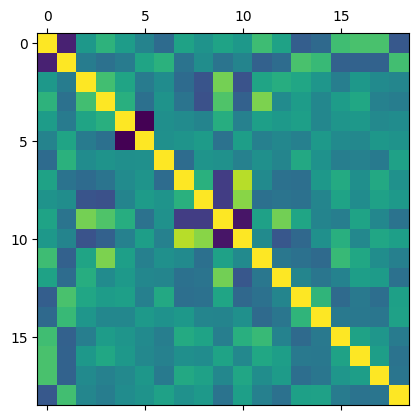

In [309]:
import matplotlib.pyplot as plt

# Create a smaller and simpler heatmap of correlations
plt.matshow(z_score_df.corr())
plt.show()

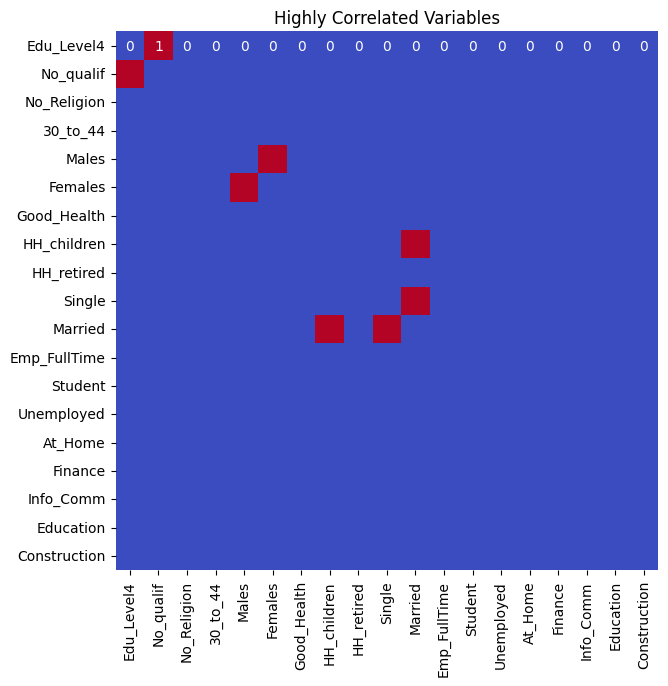

In [310]:
# Define a threshold for highly correlated variables
threshold = 0.7

# Filter highly correlated variables
highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

# Plot it
plt.figure(figsize=(7, 7))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

In [311]:
# Drop one variable from the pairs of highly correlated variables
z_score_df.drop(['Single', 'Married', 'No_qualif', 'Males'], axis=1, inplace=True)
z_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Edu_Level4    4319 non-null   float64
 1   No_Religion   4320 non-null   float64
 2   30_to_44      4306 non-null   float64
 3   Females       4320 non-null   float64
 4   Good_Health   4320 non-null   float64
 5   HH_children   4044 non-null   float64
 6   HH_retired    3235 non-null   float64
 7   Emp_FullTime  4312 non-null   float64
 8   Student       3829 non-null   float64
 9   Unemployed    3769 non-null   float64
 10  At_Home       3602 non-null   float64
 11  Finance       4321 non-null   float64
 12  Info_Comm     4321 non-null   float64
 13  Education     4321 non-null   float64
 14  Construction  4321 non-null   float64
dtypes: float64(15)
memory usage: 506.6 KB


In [312]:
# Check correlation matrix once again
corr_2 = z_score_df.corr()
corr_2.style.background_gradient(cmap='coolwarm')

,Edu_Level4,No_Religion,30_to_44,Females,Good_Health,HH_children,HH_retired,Emp_FullTime,Student,Unemployed,At_Home,Finance,Info_Comm,Education,Construction
Edu_Level4,1.000000,0.063956,0.289653,-0.105322,-0.298935,0.155096,0.031148,0.375792,0.150691,-0.404912,-0.313976,0.388329,0.428012,0.425302,-0.449476
No_Religion,0.063956,1.000000,0.391460,-0.167400,-0.030365,-0.301075,-0.477079,0.168368,0.242548,0.186906,0.048973,-0.146972,0.063039,-0.040881,-0.083981
30_to_44,0.289653,0.391460,1.000000,-0.265210,0.027755,-0.227112,-0.505924,0.606104,-0.035072,0.104990,-0.071206,0.103311,0.189298,-0.123267,-0.154756
Females,-0.105322,-0.167400,-0.265210,1.000000,0.001806,0.034379,0.097612,-0.126691,-0.076992,-0.132533,0.071407,-0.040760,-0.065798,0.055977,0.025182
Good_Health,-0.298935,-0.030365,0.027755,0.001806,1.000000,-0.289785,0.037510,0.005423,-0.088385,0.203288,0.018820,-0.140861,-0.118353,-0.179684,0.145142
HH_children,0.155096,-0.301075,-0.227112,0.034379,-0.289785,1.000000,0.269777,-0.042809,-0.256438,-0.268885,0.068251,0.221482,-0.005392,0.204514,0.009212
HH_retired,0.031148,-0.477079,-0.505924,0.097612,0.037510,0.269777,1.000000,-0.265591,-0.230969,-0.250784,-0.091248,0.157721,-0.026434,0.144929,0.073969
Emp_FullTime,0.375792,0.168368,0.606104,-0.126691,0.005423,-0.042809,-0.265591,1.000000,-0.204720,-0.251281,-0.311895,0.344297,0.191880,-0.022717,-0.131601
Student,0.150691,0.242548,-0.035072,-0.076992,-0.088385,-0.256438,-0.230969,-0.204720,1.000000,-0.092534,-0.211319,-0.114699,0.122791,0.096447,-0.253735
Unemployed,-0.404912,0.186906,0.104990,-0.132533,0.203288,-0.268885,-0.250784,-0.251281,-0.092534,1.000000,0.308238,-0.305082,-0.187542,-0.276442,0.139567


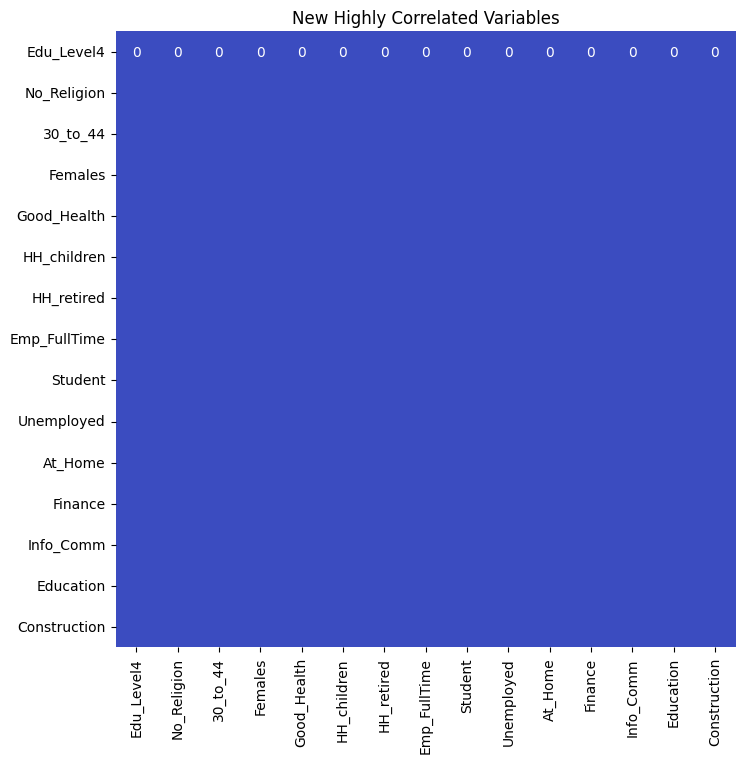

In [313]:
# Check for presence of variables with correlation >|.7|
threshold = 0.7
highly_correlated_2 = (corr_2.abs() > threshold) & (corr_2.abs() < 1.0)

plt.figure(figsize=(8, 8))
sns.heatmap(highly_correlated_2, cmap='coolwarm', cbar=False, annot=True)

plt.title('New Highly Correlated Variables')
plt.show()

### 4.4 Handle missing values

Lastly, before proceeding to perform clustering, we identify and handle missing values. Missing values are filled in with mean values of given variable.

In [342]:
# Check for missing values
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("The DataFrame contains NaN values")
else:
    print("The dataFrame does not contain NaN values")

The dataFrame does not contain NaN values


In [315]:
# Fill in the missing values
z_score_df.fillna(z_score_df.mean(), inplace=True)
z_score_df.head()

,Edu_Level4,No_Religion,30_to_44,Females,Good_Health,HH_children,HH_retired,Emp_FullTime,Student,Unemployed,At_Home,Finance,Info_Comm,Education,Construction
0,-1.242003,-0.876620,-1.082341,-0.628442,-0.479805,-3.910655e-01,-8.222867e-01,0.611757,-6.958828e-17,-3.399171e-01,-0.813641,-1.093966,-0.798349,-0.290944,-0.023835
1,0.943812,1.078255,0.195322,0.496565,-1.212030,7.730930e-17,-1.030720e+00,0.312919,4.480600e-01,-2.644813e-01,-0.966931,0.302781,1.005674,0.963301,-0.329788
2,0.833804,0.181396,-0.025254,-0.488115,-0.490862,-1.012509e+00,1.757138e-17,0.011290,2.285081e+00,1.642727e-02,-0.861223,0.406198,1.234101,0.916999,-1.205449
3,-0.061980,-0.703647,-0.295765,-1.077593,-2.178425,1.850044e+00,3.625330e-01,-0.471920,3.082476e-01,-1.036876e-17,-0.129679,-1.007162,0.523439,0.376809,0.837759
4,0.161530,-0.854115,-0.775216,0.650811,-1.712077,5.014639e-01,2.952725e-01,-1.488102,-2.001608e-01,-4.366012e-02,-0.408996,-0.090202,-0.151689,2.703226,-1.205449


## 5 Perform Clustering

Now, we can finally perform clustering to create a geodemographic classification of output areas in Edinburgh. To do this, we implement the k-means approach using the KMeans function available in the scikit-learn library. This method classifies areas into a pre-defined number of clusters. For now, we set the number of clusters to be 10.

In [316]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

# KMeans with 10 clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

(array([277., 433., 462., 474., 282., 440., 346., 728., 457., 423.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

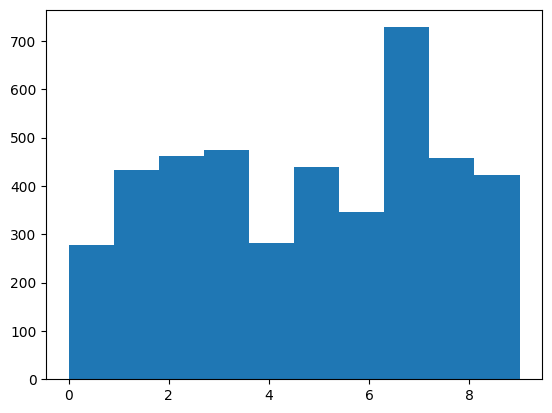

In [317]:
plt.hist(labels)

### 5.1 Determine the optimal number of clusters

Above we set the number of clusters to 10, but as we can see on the plot above, the clusters not evenly sized. A crucial step is the determine a suitable number of clusters such that each cluster is as homogenous and as distinct from other clusters as possible. Additionally, each cluster should meaningfully characterize a distinguishable type of neighbourhood.

To find the optimal number of clusters, we consider two metrics:
1. Within-cluster sum of squares - how homogenous the clusters are,
2. Between-cluster sum of squares - how far apart the clusters are.

To decide on the optimal number of clusters, we plot how these measures to see how they change as we increase the number of clusters. 

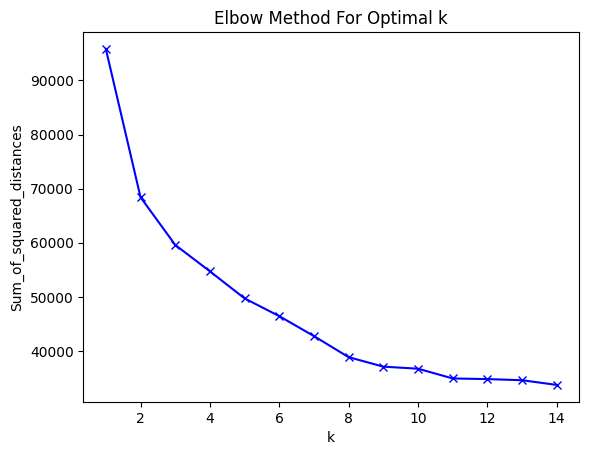

In [318]:
# Within-cluster sum of squares
Sum_of_squared_distances = []

K_range = range(1,15)

for k in K_range:
 km = KMeans(n_clusters=k)
 km = km.fit(z_score_df)
 Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As we can see on the plot above, when we have a small number of clusters, adding an additional one leads to a significant improvement in fit. On the other hand, when the number of clusters is already large, adding more clusters reduces the sum of squared distances by less and less. The choice of the optimal number of clusters is largely about finding the optimal point on this curve.

To decide on the optimal number of clusters, we rely on the so-called Elbow method. Inspecting the graphs of both metrics, we can see that the elbow of the arm is between 4 and 6 - the optimal number of clusters will be between these values. We experiment with 4, 5 and 6 clusters, adjust variable choice and evaluate the resulting clusters. As noted above, this is an iterative process.

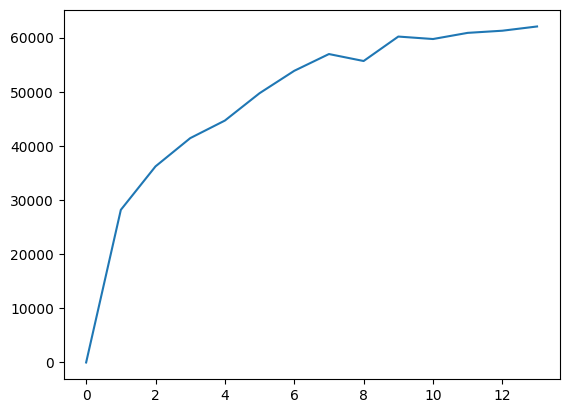

In [319]:
# Between-cluster sum of squares
import numpy as np
def elbow(dataframe, n):
    kMeansVar = [KMeans(n_clusters=k).fit(dataframe.values) for k in range(1, n)] #making use of list comprehensions.
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(dataframe.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(dataframe.values)**2)/dataframe.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
 
elbow(z_score_df,15)

In [320]:
# Perform clustering and classify areas into clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_

# Create a new column in our dataframe with corresponding cluster for each output area
z_score_df['Cluster'] = kmeans.labels_
z_score_df.head()

,Edu_Level4,No_Religion,30_to_44,Females,Good_Health,HH_children,HH_retired,Emp_FullTime,Student,Unemployed,At_Home,Finance,Info_Comm,Education,Construction,Cluster
0,-1.242003,-0.876620,-1.082341,-0.628442,-0.479805,-3.910655e-01,-8.222867e-01,0.611757,-6.958828e-17,-3.399171e-01,-0.813641,-1.093966,-0.798349,-0.290944,-0.023835,0
1,0.943812,1.078255,0.195322,0.496565,-1.212030,7.730930e-17,-1.030720e+00,0.312919,4.480600e-01,-2.644813e-01,-0.966931,0.302781,1.005674,0.963301,-0.329788,2
2,0.833804,0.181396,-0.025254,-0.488115,-0.490862,-1.012509e+00,1.757138e-17,0.011290,2.285081e+00,1.642727e-02,-0.861223,0.406198,1.234101,0.916999,-1.205449,3
3,-0.061980,-0.703647,-0.295765,-1.077593,-2.178425,1.850044e+00,3.625330e-01,-0.471920,3.082476e-01,-1.036876e-17,-0.129679,-1.007162,0.523439,0.376809,0.837759,1
4,0.161530,-0.854115,-0.775216,0.650811,-1.712077,5.014639e-01,2.952725e-01,-1.488102,-2.001608e-01,-4.366012e-02,-0.408996,-0.090202,-0.151689,2.703226,-1.205449,1


### 5.2 Visualize the clusters

After evaluation using the elbow method, we decided to perform Kmeans with 5 clusters. Now, we can visualize the resulting clusters. 

First, we use the principal component analysis to extract from the variables used for clustering two components which explain largest possible variation in these variables. This allows us to visualize the resulting clusters in a two-dimensional space. However, note that these clusters in 2D spcae can overlap, since the two principal components capture only some attributes of the multidimensional space which we considered when performing the clustering.

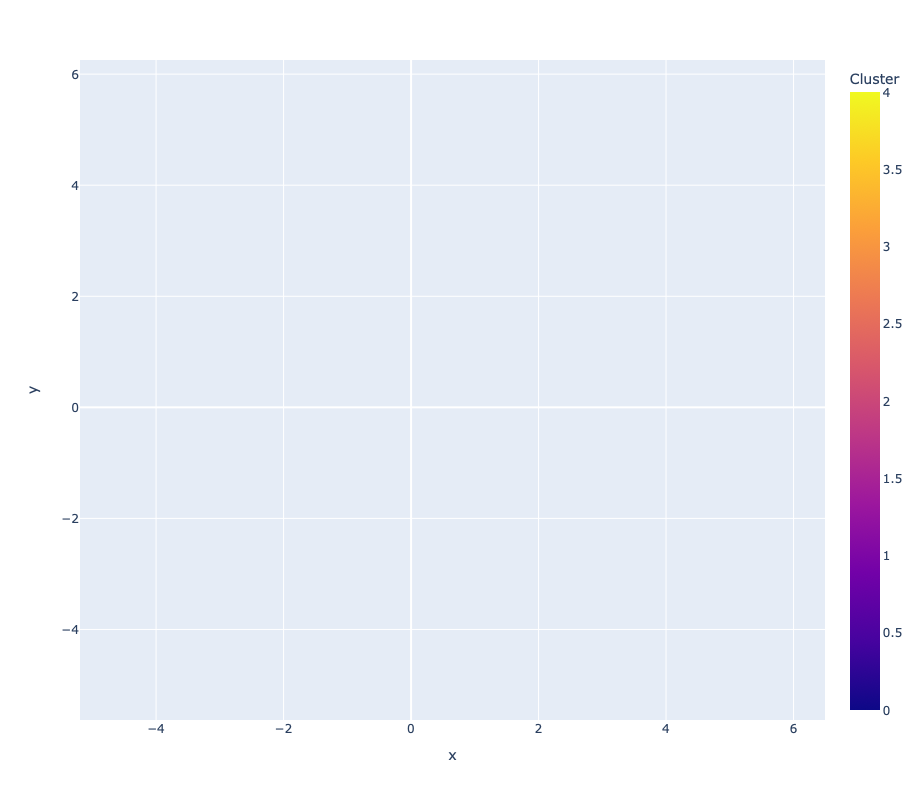

These two components explain 37.86% of the point variability.


<Figure size 1200x800 with 0 Axes>

In [321]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")

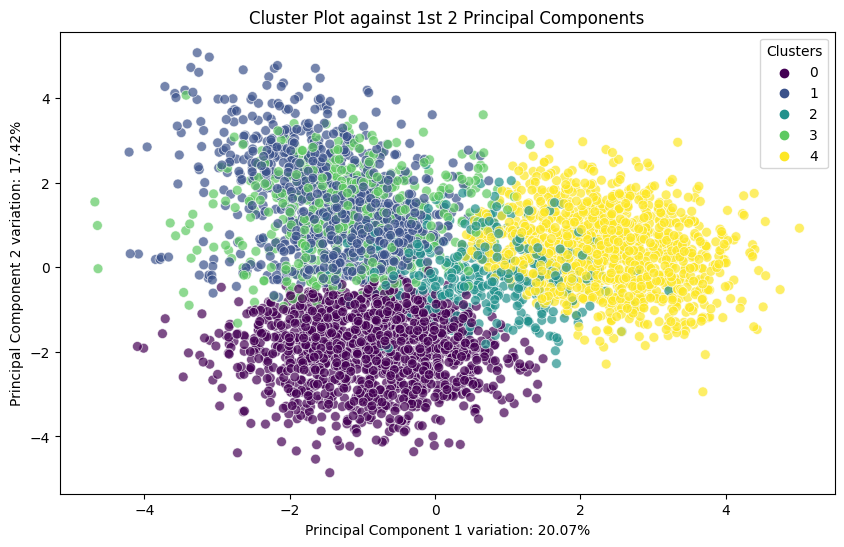

In [322]:
# Perform clustering
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

# Standardize the data for PCA
scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Plot against 1st 2 Principal Components')
plt.xlabel(f'Principal Component 1 variation: {variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 variation: {variance_ratio[1]*100:.2f}%')
plt.legend(title='Clusters')
plt.show()


### 5.3 Interpret the clusters

Next step is to interpret clusters as meaningful types of neighbourhoods. To characterize the clusters of neighbourhoods by typical characteristics of their inhabitants, we first calculate the mean value for each variable in each cluster. Subsequently, we can visualize these mean values using radial charts which helps us to interpret what type of neighbourhood each cluster corresponds to.

In [323]:
# KMeans clustering
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a dataframe with cluster centres
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=z_score_df.columns)
cluster_centers.head(5)

,Edu_Level4,No_Religion,30_to_44,Females,Good_Health,HH_children,HH_retired,Emp_FullTime,Student,Unemployed,At_Home,Finance,Info_Comm,Education,Construction,Cluster
0,0.690334,0.512671,1.057470,-0.328949,0.011220,-0.475745,-0.397770,1.053643,0.014596,-0.153257,-0.334596,0.364339,0.444650,-0.048715,-0.365038,3.982201
1,-0.500824,-0.976573,-0.818347,0.512255,0.568553,0.013440,0.849181,-0.329027,-0.303771,-0.299372,-0.231434,0.087131,-0.328224,-0.010690,0.115365,0.734375
2,0.375165,0.753104,-0.494542,-0.142467,-0.440255,-0.549318,-0.330327,-0.936835,2.152513,-0.283957,-0.437935,-0.508640,0.312510,0.565360,-0.688311,1.989770
3,0.649313,-0.547301,-0.439968,0.060467,-0.670941,1.276120,0.397566,-0.135907,-0.346305,-0.440741,-0.005519,0.529673,0.260247,0.649711,-0.235912,0.002245
4,-1.114454,0.224570,-0.132309,0.043439,0.323473,-0.312437,-0.301140,-0.530248,-0.306601,0.821736,0.684219,-0.713385,-0.611444,-0.665646,0.772087,1.730909


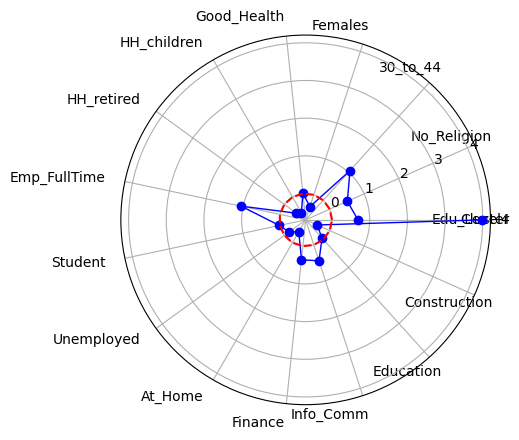

In [324]:
# Cluster No 1: Highly-educated younger professionals

# Filter the first row of cluster_centres dataframe: Cluster 1
first_row_centers = cluster_centers.iloc[0, :]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')

# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()


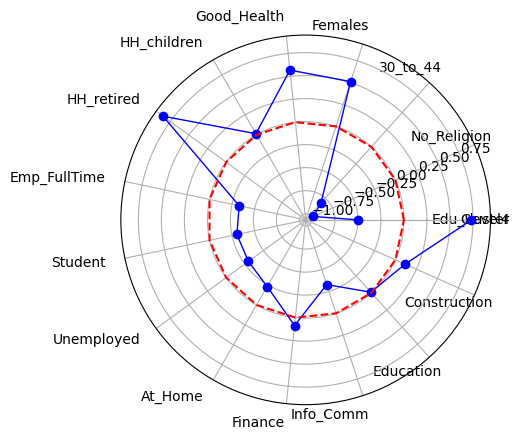

In [325]:
# Cluster No 2: Older populations
second_row_centers = cluster_centers.iloc[1, :]

# len of features
num_features2 = len(second_row_centers)

# polar coordinates
theta2 = np.linspace(0, 2 * np.pi, num_features2, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta2, second_row_centers, linewidth=1, color='blue', marker='o', label='Centers')

# Add an extra red line at the 0.0 value
ax.plot(theta2, np.zeros_like(second_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta2)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()

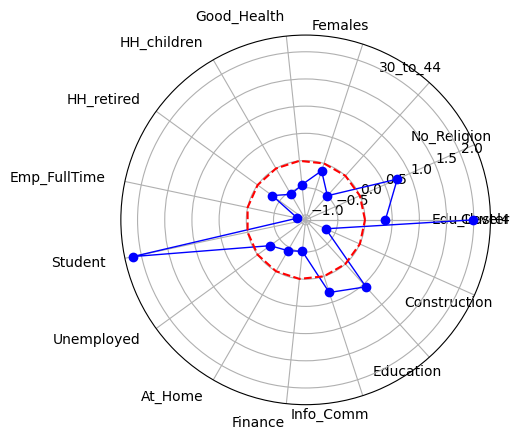

In [326]:
# Cluster No 3: Students 
third_row_centers = cluster_centers.iloc[2, :]

# len of features
num_features3 = len(third_row_centers)

# polar coordinates
theta3 = np.linspace(0, 2 * np.pi, num_features3, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta3, third_row_centers, linewidth=1, color='blue', marker='o', label='Centers')

# Add an extra red line at the 0.0 value
ax.plot(theta3, np.zeros_like(third_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta3)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()

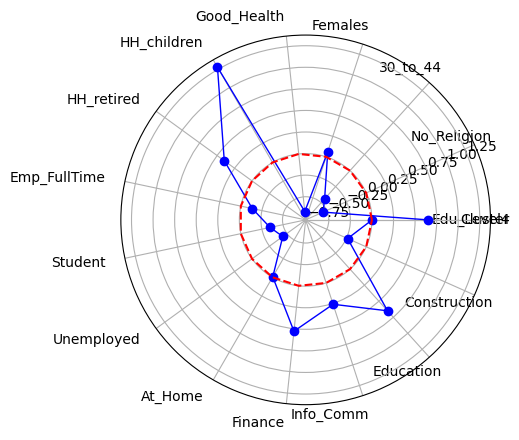

In [327]:
# Cluster No 4: Middle-class families with dependent children
fourth_row_centers = cluster_centers.iloc[3, :]

# len of features
num_features4 = len(fourth_row_centers)

# polar coordinates
theta4 = np.linspace(0, 2 * np.pi, num_features4, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta4, fourth_row_centers, linewidth=1, color='blue', marker='o', label='Centers')

# Add an extra red line at the 0.0 value
ax.plot(theta4, np.zeros_like(fourth_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta4)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()

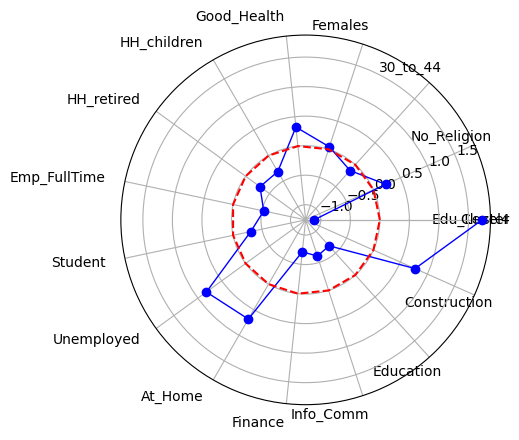

In [328]:
# Cluster No 5: Lower-income neighbourhoods
fifth_row_centers = cluster_centers.iloc[4, :]

# len of features
num_features5 = len(fifth_row_centers)

# polar coordinates
theta5 = np.linspace(0, 2 * np.pi, num_features5, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta5, fifth_row_centers, linewidth=1, color='blue', marker='o', label='Centers')

# Add an extra red line at the 0.0 value
ax.plot(theta5, np.zeros_like(fifth_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta5)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()

## 6 Finalize and map the results

Finally, we can map the neighbourhoods based on our classifications. First, we keep only relevant columns and prepare a final dataset for mapping. Then we can set names to clusters and create in interactive map visualizing classified neighbourhoods.

In [330]:
list(z_score_df.columns)

['Edu_Level4',
 'No_Religion',
 '30_to_44',
 'Females',
 'Good_Health',
 'HH_children',
 'HH_retired',
 'Emp_FullTime',
 'Student',
 'Unemployed',
 'At_Home',
 'Finance',
 'Info_Comm',
 'Education',
 'Construction',
 'Cluster']

In [331]:
z_score_df.drop([
 'Edu_Level4',
 'No_Religion',
 '30_to_44',
 'Females',
 'Good_Health',
 'HH_children',
 'HH_retired',
 'Emp_FullTime',
 'Student',
 'Unemployed',
 'At_Home',
 'Finance',
 'Info_Comm',
 'Education',
 'Construction'], axis=1, inplace=True)

z_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Cluster  4322 non-null   int32
dtypes: int32(1)
memory usage: 17.0 KB


In [332]:
# Concatenate the resulting tables.
final_df = pd.concat([edi_census_data, z_score_df], axis=1, ignore_index=False)
final_df.head()

,code,popcount,hhcount,geometry,Edu_Level4,No_qualif,No_Religion,30_to_44,Males,Females,...,Married,Emp_FullTime,Student,Unemployed,At_Home,Finance,Info_Comm,Education,Construction,Cluster
0,S00106438,151,65,"POLYGON ((312053.000 672642.000, 312066.000 67...",16.535433,37.795276,35.761589,13.245033,52.317881,47.682119,...,40.157480,48.695652,NaN,3.478261,1.739130,3.614458,1.204819,8.433735,4.819277,1
1,S00105168,85,56,"POLYGON ((324246.744 672500.389, 324261.290 67...",60.000000,7.058824,56.470588,24.705882,45.882353,54.117647,...,9.411765,45.000000,7.500000,3.750000,1.250000,12.500000,7.142857,16.071429,3.571429,4
2,S00104758,66,32,"POLYGON ((325970.413 672363.682, 325972.882 67...",57.812500,NaN,46.969697,22.727273,51.515152,48.484848,...,9.375000,41.269841,15.873016,4.761905,1.587302,13.157895,7.894737,15.789474,0.000000,2
3,S00106865,133,48,"POLYGON ((315157.369 666212.846, 315173.727 66...",40.000000,10.476190,37.593985,20.300752,54.887218,45.112782,...,63.809524,35.294118,6.862745,NaN,3.921569,4.166667,5.555556,12.500000,8.333333,0
4,S00106064,100,50,"POLYGON ((331506.489 673162.694, 331671.000 67...",44.444444,28.395062,36.000000,16.000000,45.000000,55.000000,...,48.148148,22.727273,4.545455,4.545455,3.030303,10.000000,3.333333,26.666667,0.000000,0


In [343]:
# Set names of clusters 
def rename_column(x): 
    x = str(x)
    x = x.replace("0", "Affluent young professionals")
    x = x.replace("1", "Elderly populations")
    x = x.replace("2", "Students")
    x = x.replace("3", "Middle-class families with dependent children")
    x = x.replace("4", "Lower-income neighbourhoods")
    return x

final_df['Cluster'] = final_df['Cluster'].apply(rename_column)

In [ ]:
final_df.explore(column='Cluster', cmap='Set3', tiles='CartoDB positron')

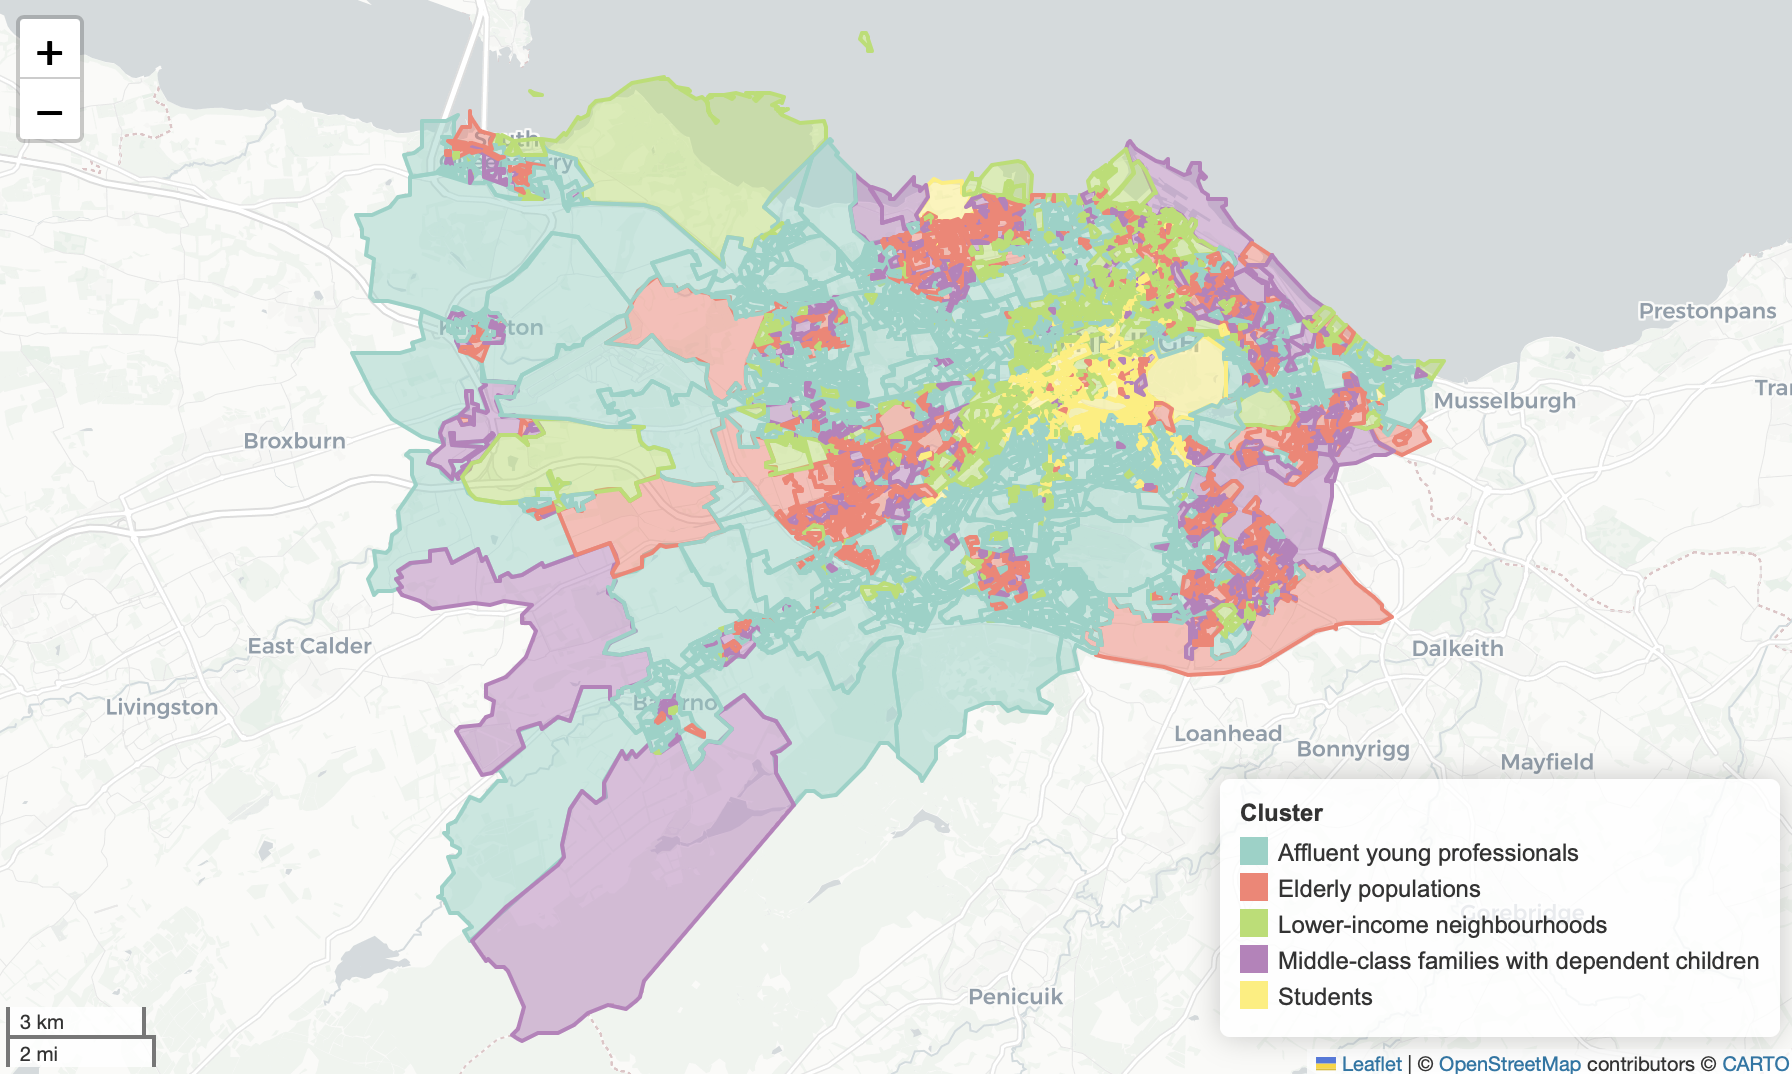

## Conclusion

In this challenge, we performed K-means clustering to classify neighbourhoods in Edinburgh for commercial purposes. The results of our analysis have several implications for the defined problem:

1. Edinburgh seems to be a suitable city for the chain's expansion - a large proportion of neighbourhoods are populated by highly-educated young professional which are the main target group of the chain. These could serve as the primary target of chain's marketing campaign.
2. In the central part of the city, there are neighbourhoods with a high concentration of students - which is a new target group the chain aims to appeal to.
3. Plenty of options for localization of stores - smaller ones in the city center, supermarkets in the suburbs. However, geodemographic classification provides only a partial information for localization decisions, other factors need to be considered such as rent prices.

Finally, it is important to note that clustering, though a data-centered method, remains to a large extent subjective. Multiple steps of the analysis depend ultimately on one's judgement, including the choice of variables, selection of the optimal number of clusters and their interpretation. All these decisions should be made with the consideration of purpose of classification.

Nonetheless, despite the ultimately subjective nature of clustering, it is one of the best methods available for purposes such as customer segmentation and it can provide valuable insights.